<a href="https://colab.research.google.com/github/Morty00933/python/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Установка TensorFlow 2.x (если не установлено)
!pip install -q tensorflow

# Импорт необходимых библиотек
import tensorflow as tf
from tensorflow.keras import layers, models

# Загрузка датасета CIFAR-10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Нормализация значений пикселей к диапазону [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Определение архитектуры сверточной нейронной сети
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Добавление полносвязных слоев для классификации
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Вывод информации о модели
model.summary()

# Обучение модели на тренировочных данных
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


170498071/170498071 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                       

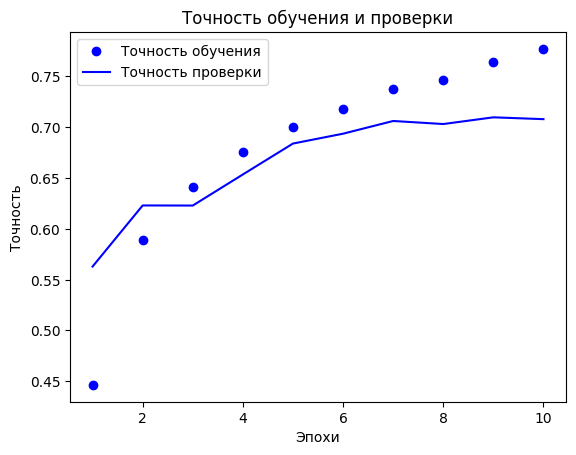

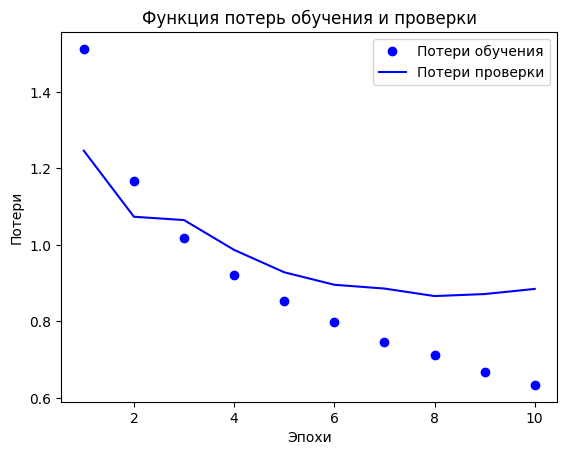

In [ ]:
import matplotlib.pyplot as plt

# Визуализация результатов обучения
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Визуализация точности обучения и проверки
plt.plot(epochs, acc, 'bo', label='Точность обучения')
plt.plot(epochs, val_acc, 'b', label='Точность проверки')
plt.title('Точность обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.figure()

# Визуализация функции потерь обучения и проверки
plt.plot(epochs, loss, 'bo', label='Потери обучения')
plt.plot(epochs, val_loss, 'b', label='Потери проверки')
plt.title('Функция потерь обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()
